<img src="log_reg_thumb.jpg" width=70%>

# Logistic Regression

In [125]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

# 1. Generate Data

1.1 Generate Data Categorical Data

In [31]:
x = np.arange(0,15)
n_0 = 7
y = np.array(n_0*[0] + (x.shape[0] - n_0)*[1])
#print(y.shape[0],x.shape[0])

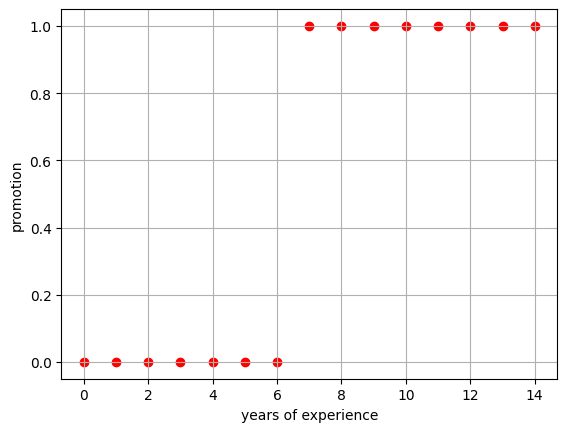

In [60]:
plt.scatter(x,y,color='red',marker='o')
plt.xlabel('years of experience')
plt.ylabel('promotion')
plt.grid('on')

1.2 Fit categorical data with Linear Regression

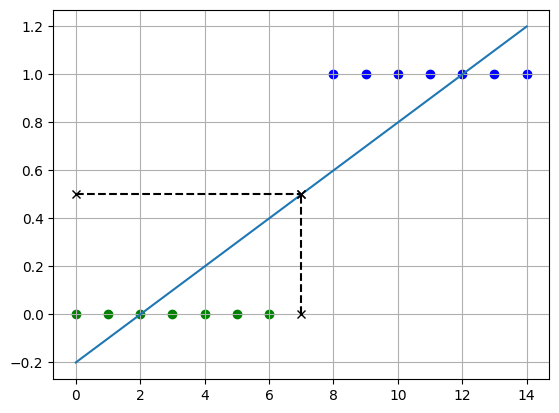

In [87]:
for x_i, y_i in zip(list(x),list(y)):
    if x_i < 7:
        plt.scatter(x_i,y_i,color='green',marker='o')
    if x_i > 7:
        plt.scatter(x_i,y_i,color='blue',marker='o')
plt.grid('on')
plt.plot(x,0.1*x-0.2)
plt.plot([7,7],[0,0.5],color='black',linestyle='dashed',marker='x')
plt.plot([0,7],[0.5,0.5],color='black',linestyle='dashed',marker='x')
plt.show()

In [88]:
#Initialize Parameters
w = np.random.uniform(-0.5,0.5)
b = np.random.uniform(0,4)

#Define auxiliary variables to track values in time
w_in_time = [w]
b_in_time = [b]
dw_in_time = []
db_in_time = []
mse_in_time = []

#Run Gradient Descent
for item in range(150):
    #Step 1: computed cost and gradients
    y_pred = w*x + b
    error = y_pred - y
    dw = np.dot(x.T,error)/x.shape[0]
    db = np.sum(error)/x.shape[0]
    mse = np.dot(error.T,error)/x.shape[0]
    #dw,db, mse
    dw_in_time.append(dw)
    db_in_time.append(db)
    mse_in_time.append(mse)
    
    #Step 2: updated params
    lr = 0.01
    w = w - lr*dw
    b = b - 0.08*db
    w_in_time.append(w)
    b_in_time.append(b)

In [85]:
w,b

(0.07936623896996223, 0.026815370097436893)

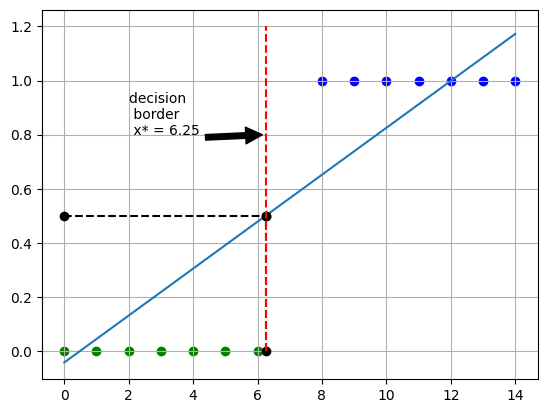

In [90]:
for x_i, y_i in zip(list(x),list(y)):
    if x_i < 7:
        plt.scatter(x_i,y_i,color='green',marker='o')
    if x_i > 7:
        plt.scatter(x_i,y_i,color='blue',marker='o')
plt.grid('on')
plt.plot(x,w*x+b)
x_border = (0.5 - b)/w
plt.plot([x_border,x_border],[0,0.5],color='black',linestyle='dashed',marker='o')
plt.plot([0,x_border],[0.5,0.5],color='black',linestyle='dashed',marker='o')
plt.plot([x_border,x_border],[0,1.2],color='red',linestyle='dashed')

plt.annotate('decision \n border \n x* = {:.2f}'.format(x_border), xy=(x_border, 0.8), xytext=(2, 0.8),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

1.3 Illustrate instability of Linear Regression and resulting errorous classification

In [77]:
y1 = y.copy()
y1 = np.append(y,1)
x1 = np.append(x,50)

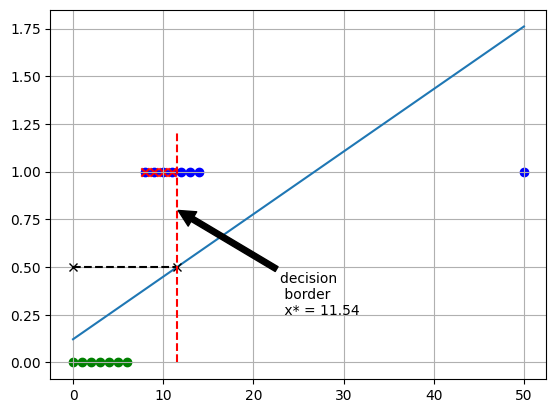

In [91]:
#Initialize Parameters
#w = np.random.uniform(-0.5,0.5)
#b = np.random.uniform(0,4)

#Define auxiliary variables to track values in time
w_in_time = [w]
b_in_time = [b]
dw_in_time = []
db_in_time = []
mse_in_time = []

#Run Gradient Descent
for item in range(200):
    #Step 1: computed cost and gradients
    y_pred = w*x1 + b
    error = y_pred - y1
    dw = np.dot(x1,error)/x1.shape[0]
    db = np.sum(error)/x1.shape[0]
    mse = np.dot(error.T,error)/x1.shape[0]
    #dw,db, mse
    dw_in_time.append(dw)
    db_in_time.append(db)
    mse_in_time.append(mse)
    
    #Step 2: updated params
    lr = 0.005
    w = w - lr*dw
    b = b - lr*db
    w_in_time.append(w)
    b_in_time.append(b)
    
x_border = (0.5 - b)/w
for x_i, y_i in zip(list(x1),list(y1)):
    if x_i < 7:
        plt.scatter(x_i,y_i,color='green',marker='o')
    if x_i > 7:
        plt.scatter(x_i,y_i,color='blue',marker='o')
    if x_i <= x_border and x_i > 7:
        plt.scatter(x_i,y_i,color='red',marker='x')

plt.grid('on')
plt.plot(x1,w*x1+b)
x_border = (0.5 - b)/w
#plt.plot([6,6],[0,0.5],color='black',linestyle='dashed',marker='x')
plt.plot([0,x_border],[0.5,0.5],color='black',linestyle='dashed',marker='x')
plt.plot([x_border,x_border],[0,1.2],color='red',linestyle='dashed')

plt.annotate('decision \n border \n x* = {:.2f}'.format(x_border), 
             xy=(x_border, 0.8), 
             xytext=(23, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.show()

In [79]:
w,b

(0.033434514976295, 0.10690863891771064)

1.4 Introducing Sigmoid Function

$$
  y(x) = \frac{1}{1+e^{-x}}
$$

$$
  y(x|w,b) = \frac{1}{1+e^{-(wx+b)}}
$$


In [106]:
def sigmoid(x,
            w=1,
            b=0):
    return 1/(1+np.exp(-(w*x+b)))

In [107]:
x_sig = np.arange(-5,5.1,0.1)
sig = sigmoid(x_sig)
sig_3_10 = sigmoid(x_sig,3,10)

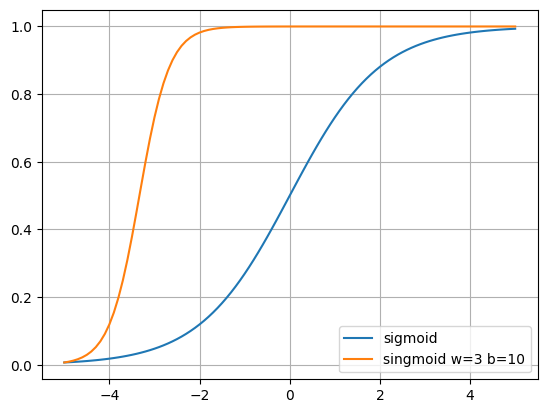

In [108]:
plt.plot(x_sig,sig)
plt.plot(x_sig,sig_3_10)
plt.grid('on')
plt.legend(['sigmoid','singmoid w=3 b=10'])

Text(13, 0.8, 'decision \n border \n x* = 6.41')

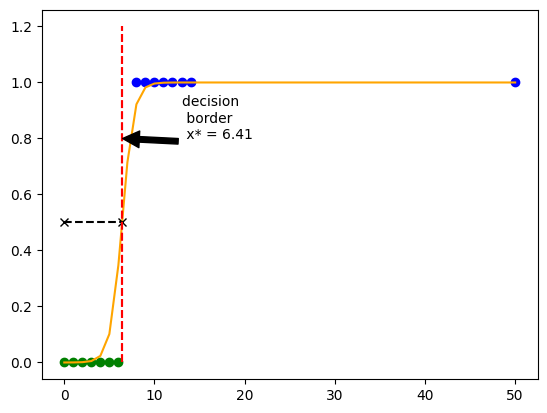

In [109]:
for x_i, y_i in zip(list(x1),list(y1)):
    if x_i < 7:
        plt.scatter(x_i,y_i,color='green',marker='o')
    if x_i > 7:
        plt.scatter(x_i,y_i,color='blue',marker='o')
w1 = 1.55
b1 = -9.93
x_border_sig = (-np.log(1/0.5 - 1) - b1)/w1  

plt.plot(x1,sigmoid(x1,1.55,-9.93),color="orange")
plt.plot([x_border_sig,x_border_sig],[0,1.2],color='red',linestyle='dashed')

plt.plot([0,x_border_sig],[0.5,0.5],color='black',linestyle='dashed',marker='x')
plt.plot([x_border_sig,x_border_sig],[0,1.2],color='red',linestyle='dashed')

plt.annotate('decision \n border \n x* = {:.2f}'.format(x_border_sig), 
             xy=(x_border_sig, 0.8), 
             xytext=(13, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.01))


# 2. Investigate MSE Cost Function 

$$
  MSE = J(\omega,b) = \frac{1}{N}\sum_{i=1}^N(y_i - sigmoid(\omega*x_i+b))^2
$$


2.1 MSE profiles for various fixed values of parameter b

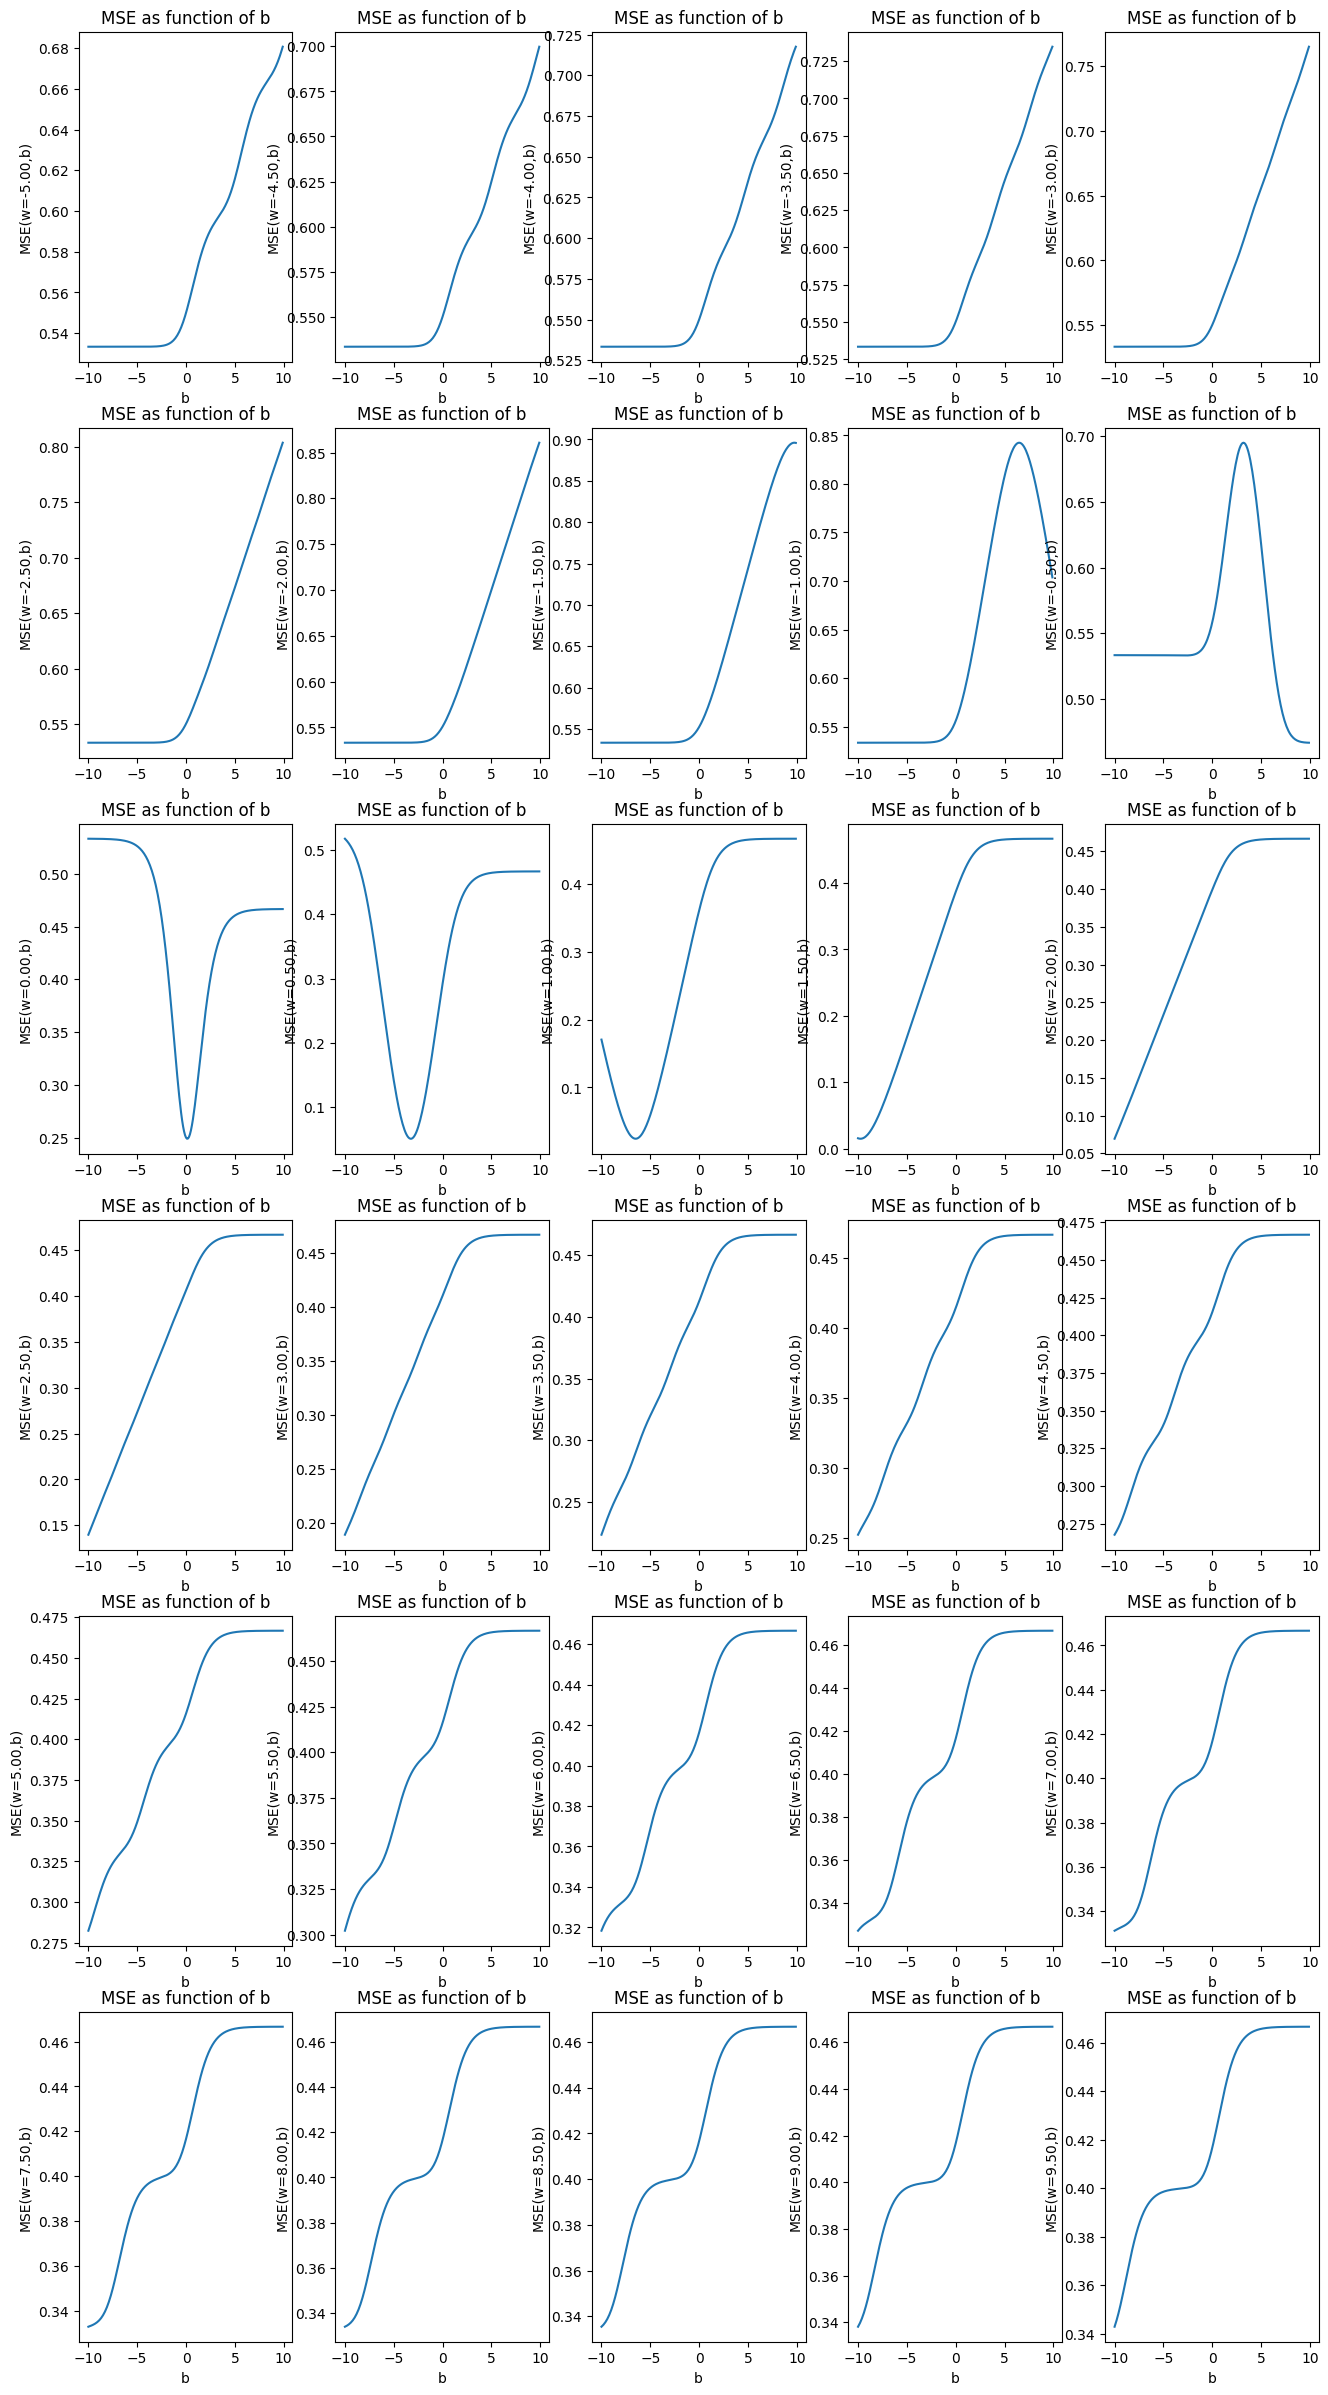

In [111]:
plt.figure(figsize=(16,30))
w_list = list(np.arange(-5,10,0.5))
#print(len(w_list))
#b_list = list(np.arange(-4,10.2,0.2))
k = 0
for w in w_list:
    MSE_by_b = []
    k += 1
    for b in b_list:
        error = sigmoid(w*x+b) - y
        MSE_by_b.append(np.dot(error,error)/x.shape[0])
    #print(len(MSE_by_b))
    #print(len(b_list))
    plt.subplot(6,5,k) 
    plt.plot(b_list,MSE_by_b)
    plt.title('MSE as function of b')
    plt.xlabel('b')
    plt.ylabel('MSE(w={:.2f},b)'.format(w))

plt.show()

2.2 MSE profiles for various fixed values of parameter w

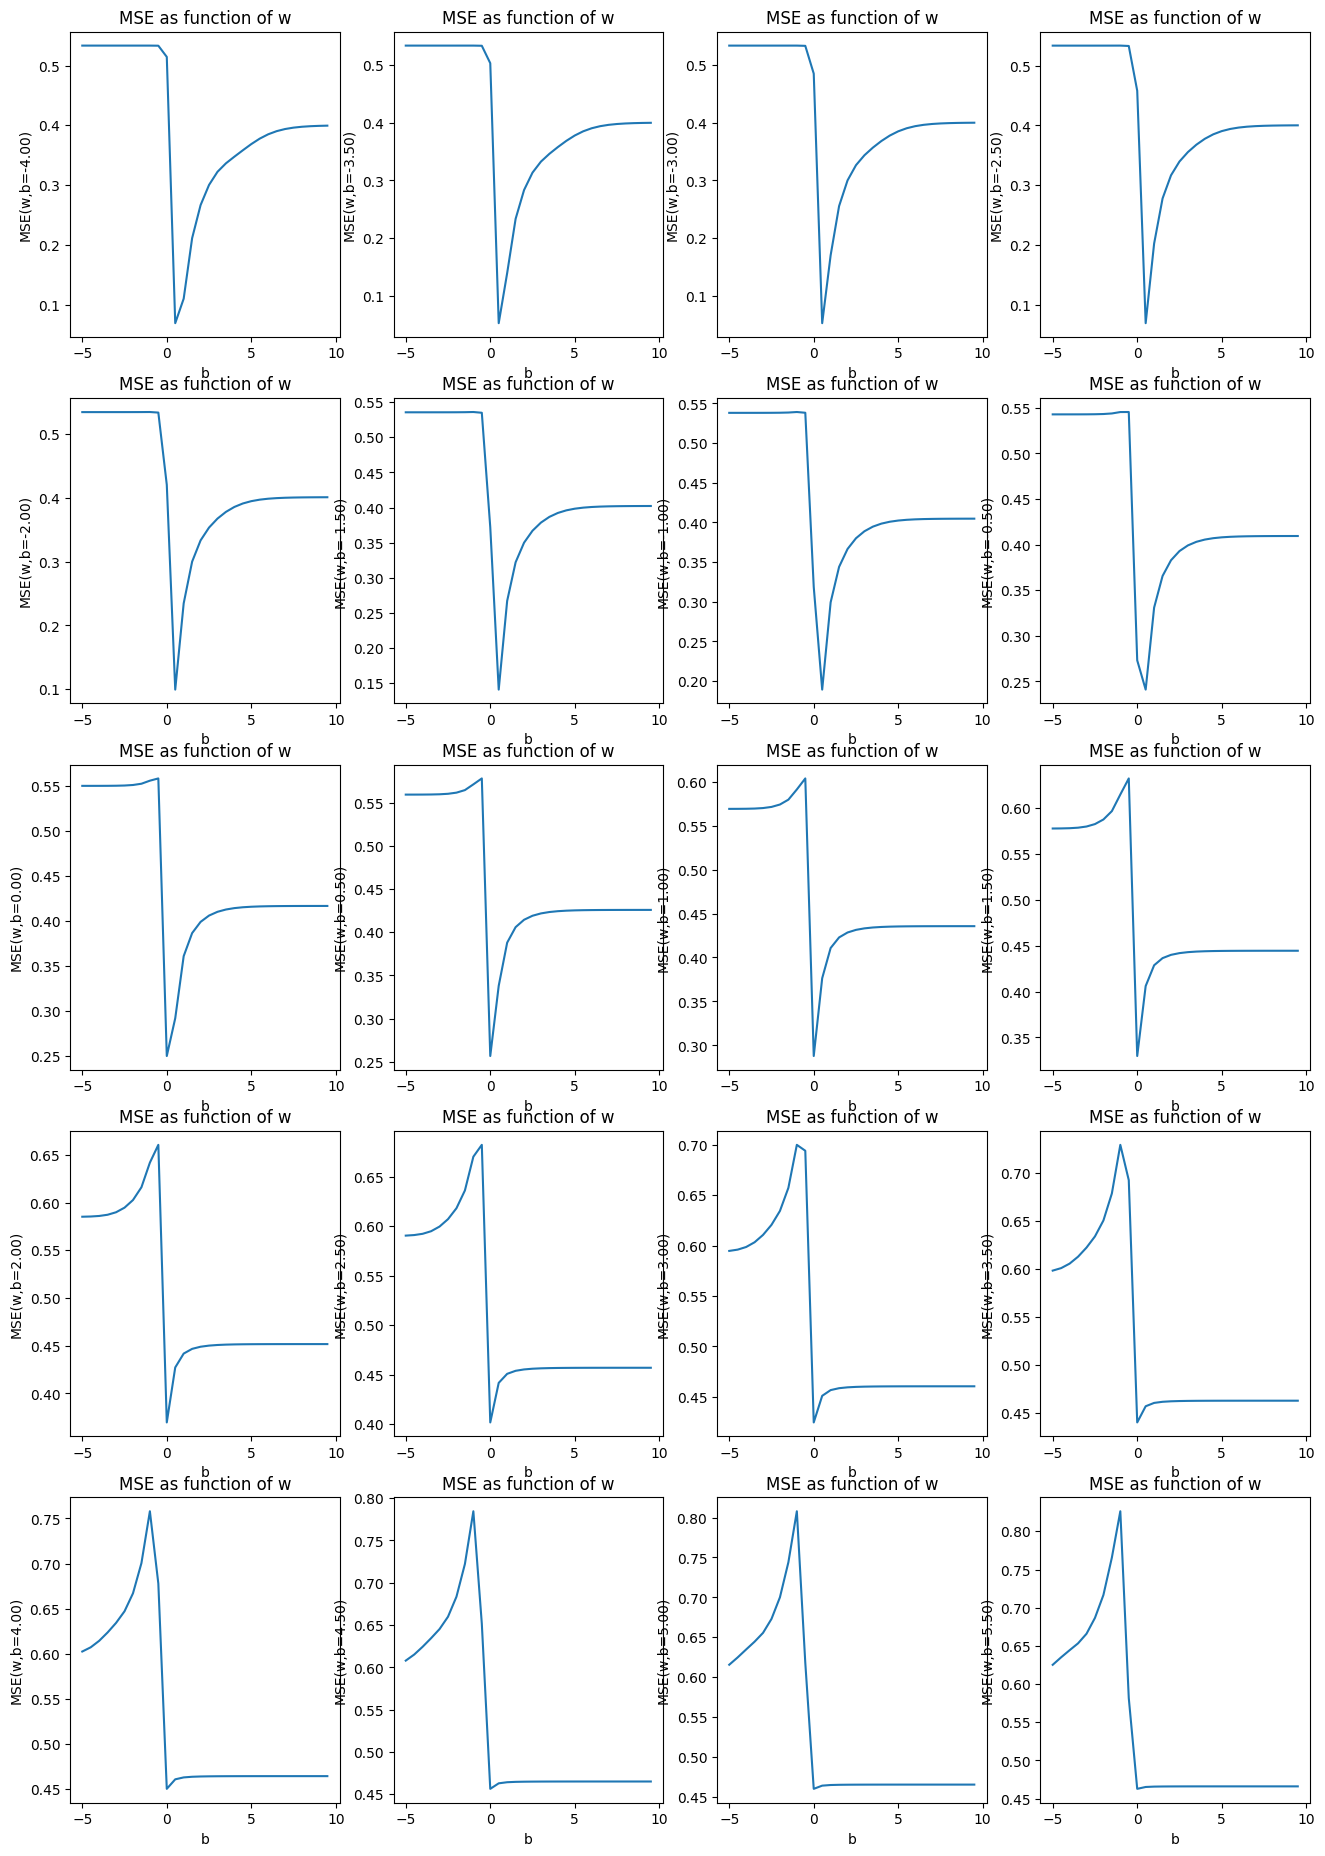

In [27]:
plt.figure(figsize=(16,23))
b_list = list(np.arange(-4,5.6,0.5))
w_list = list(np.arange(-5,10,0.5))
#print(len(b_list))

k = 0
for b in b_list:
    MSE_by_w = []
    k += 1
    for w in w_list:
        error = sigmoid(w*x+b) - y
        MSE_by_w.append(np.dot(error,error)/x.shape[0])
    plt.subplot(5,4,k) 
    plt.plot(w_list,MSE_by_w)
    plt.title('MSE as function of w')
    plt.xlabel('b')
    plt.ylabel('MSE(w,b={:.2f})'.format(b))

plt.show()

2.3 MSE as a function of both parameters w and b

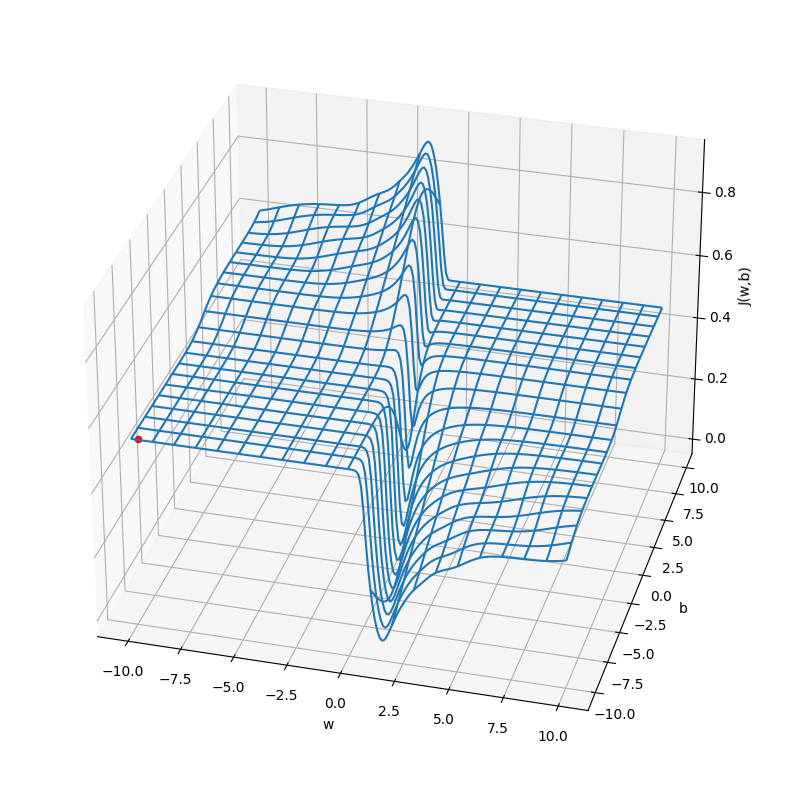

In [144]:
num_samples = x.shape[0]
W = np.arange(-10,10,0.1)
w_list = list(W)
B = np.arange(-10,10,0.1)
b_list = list(B)
W_grid, B_grid = np.meshgrid(W, B)

J_2 = np.zeros((W.shape[0],B.shape[0]))
for i,w in enumerate(w_list):
    for j,b in enumerate(b_list):
        sig_param = sigmoid(x,w,b)
        error = y - sig_param
        loss = np.dot(error,error)/num_samples
        J_2[i,j] = loss
        #print(i,j,w,b,MSE)

#%matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(W_grid, B_grid, J_2.T, 
                         rstride=10, 
                         cstride=10)
ax.scatter(w_list[3],b_list[1],J_2[3,1], marker='o',color="red")
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w,b)')
ax.view_init(30,
             -75)

# 3. Cross-entropy Loss Function for Logistic Regression

3.1 Loss Function for positive class

$$
  J_{+}(w,b) = -\frac{1}{N}[\sum_i^N log(\frac{1}{1+e^{-(w*x_i+b)}})]
$$

$$
  J_{+}(w,b) = -\frac{1}{N}[\sum_i^N log(sigmoid(x_i,w,b))]
$$

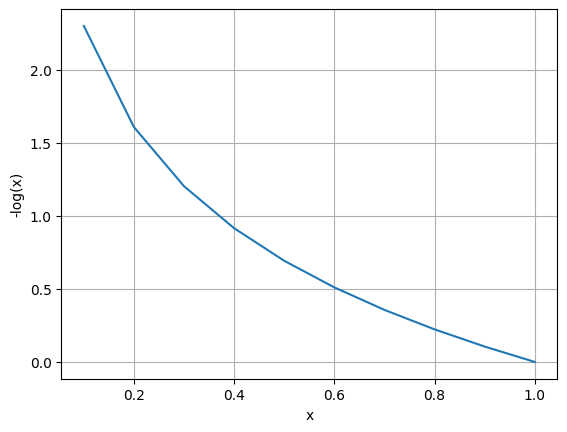

In [116]:
x_cost_1 = np.arange(0.1,1.1,0.1)
log_1 = -np.log(x_cost_1)
plt.plot(x_cost_1,log_1)
plt.xlabel('x')
plt.ylabel('-log(x)')
plt.grid('on')

$$
  J_{-}(w,b) = -\frac{1}{N}[\sum_i^N log(1- \frac{1}{1+e^{-(w*x_i+b)}})]
$$

$$
  J_{-}(w,b) = -\frac{1}{N}[\sum_i^N log(1-sigmoid(x_i,w,b))]
$$

3.2 Loss Function for negative class

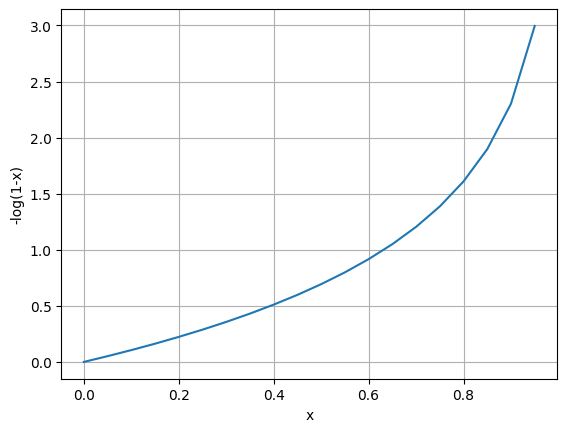

In [128]:
x_cost_0 = np.arange(0.0,1.0,0.05)
log_0 = -np.log(1-x_cost_0)
plt.plot(x_cost_0,log_0)
plt.xlabel('x')
plt.ylabel('-log(1-x)')
plt.grid('on')

3.3 Unified Loss Function for both classes: Binary Cross-Entropy

$$
  y = sigmoid(w*x+b)
$$

$$
  J(w,b) = -\frac{1}{N}[\sum_i^N(y_i*log(sigmoid(x_i,w,b)) + (1-y_i)*log(1-sigmoid(x_i,w,b)))]
$$

In [145]:
num_samples = x.shape[0]
#W = np.arange(-4,2.45,0.05)
W = np.arange(0,2.25,0.05)
w_list = list(W)
#B = np.arange(-5,2.75,0.05)
B = np.arange(-12,2.65,0.05)
b_list = list(B)
W_grid, B_grid = np.meshgrid(W, B)

J = np.zeros((W.shape[0],B.shape[0]))
for i,w in enumerate(w_list):
    for j,b in enumerate(b_list):
        sig_param = sigmoid(x,w,b)
        loss = -(np.dot(y,np.log(sig_param)) + np.dot(1-y,np.log(1-sig_param)))/num_samples
        J[i,j] = loss
        #print(i,j,w,b,MSE)

Text(0.5, 0, 'J(w,b)')

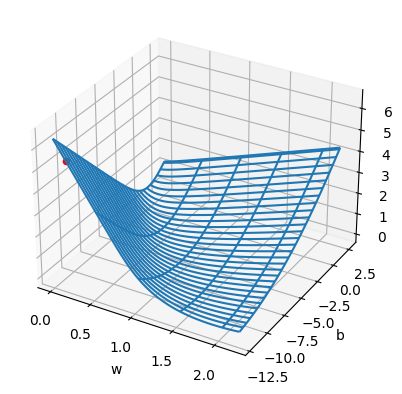

In [146]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_wireframe(W_grid, B_grid, J.T, 
                         rstride=10, 
                         cstride=10)
ax.scatter(w_list[3],b_list[1],J[3,1], marker='o',color="red")
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w,b)')

In [147]:
#cost function
num_samples = x.shape[0]
sig = sigmoid(x)
loss_sig = -(np.dot(y,np.log(sig)) + np.dot(1-y,np.log(1-sig)))/num_samples
loss_sig

1.4807137869176827

# 4. Run Gradient Descent

$$
  J(w,b) = -\frac{1}{N}[\sum_i^N(y_i*log(sigmoid(x_i,w,b)) + (1-y_i)*log(1-sigmoid(x_i,w,b)))]
$$

4.1 Partial derivative with respect to parameter w

$$
  \frac{\partial J(w,b)}{\partial w} = -\frac{1}{N}[\sum_i^N(x_i*(sigmoid(x_i,w,b)-y_i))]
$$

In [148]:
dw = np.dot(x, sig-y)/num_samples
dw

1.3479471414016142

4.2 Partial derivative with respect to parameter b

$$
  \frac{\partial J(w,b)}{\partial w} = -\frac{1}{N}[\sum_i^N(sigmoid(x_i,w,b)-y_i))]
$$

In [149]:
db = np.sum(sig-y)/num_samples
db

0.4023891312112651

4.3 Update parameters w and b

In [150]:
lr = 0.01
print('Before update w',w,'b',b)
w = w - lr*dw
b = b - lr*db
print('After update w',w,'b',b)

Before update w 2.2 b 2.6000000000002075
After update w 2.186520528585984 b 2.595976108688095


4.4 Run Gradient Descents Algo

In [151]:
#initialize weights
# y = sig(w*x+b)
w = np.random.uniform(-0.5,0.5)
b = np.random.uniform(0,1)

loss_in_time = []
w_in_time = [w]
b_in_time = [b]
dw_in_time = []
db_in_time = []

num_samples = x.shape[0]

iter = 5000

for iter_num in range(iter):
    #Step 1: compute gradients

    #compute predictions
    y_pred = sigmoid(x,w,b)

    #compute loss function
    loss_sig = -(np.dot(y,np.log(y_pred)) + np.dot(1-y,np.log(1-y_pred)))/num_samples
    loss_in_time.append(loss_sig)

    #compute gradients
    dw = np.dot(x, y_pred-y)/num_samples
    db = np.sum(y_pred-y)/num_samples
    dw_in_time.append(dw)
    db_in_time.append(db)

    #Step 2: update weights
    lr = 0.1
    w = w - lr*dw
    b = b - lr*db
    w_in_time.append(w)
    b_in_time.append(b)


In [152]:
w,b

(1.556030964973873, -9.944121268293612)

# 5. Visualize Gradient Descent

Text(0.5, 0, 'J(w,b)')

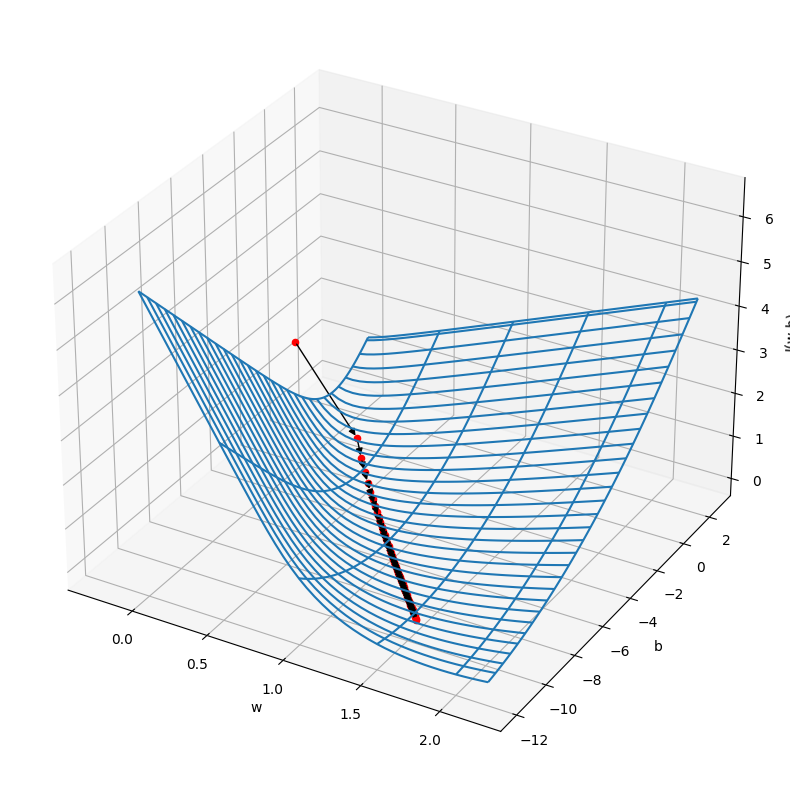

In [153]:
W = np.arange(0,2.25,0.05)
w_list = list(W)
B = np.arange(-12,2.65,0.05)
b_list = list(B)
W_grid, B_grid = np.meshgrid(W, B)

J = np.zeros((W.shape[0],B.shape[0]))
for i,w in enumerate(w_list):
    for j,b in enumerate(b_list):
        sig_param = sigmoid(x,w,b)
        loss = -(np.dot(y,np.log(sig_param)) + np.dot(1-y,np.log(1-sig_param)))/num_samples
        J[i,j] = loss
        #print(i,j,w,b,MSE)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(W_grid, B_grid, J.T, 
                         rstride=10, 
                         cstride=10)
cut_off = 100
#ax.scatter(5,3,0, marker='X',color="green")

#for w_val, b_val, loss_val in zip(w_in_time[:cut_off],b_in_time[:cut_off],loss_in_time[:cut_off]):
#    ax.scatter(w_val,b_val,loss_val, marker='o',color="red")

#for w_val, b_val, loss_val in zip(w_in_time[:-1],b_in_time[:-1],loss_in_time):
#    ax.scatter(w_val,b_val,loss_val, marker='o',color="red")

selected_w = []
selected_b = []
selected_loss = []

for w_val, b_val, loss_val in zip(w_in_time[0:iter:100],b_in_time[0:iter:100],loss_in_time[0:iter:100]):
    selected_w.append(w_val)
    selected_b.append(b_val)
    selected_loss.append(loss_val)
    ax.scatter(w_val,b_val,loss_val, marker='o',color="red")

for ind in range(len(selected_w)-1):
    a = Arrow3D([selected_w[ind], selected_w[ind+1]], [selected_b[ind], selected_b[ind+1]], 
                [selected_loss[ind], selected_loss[ind+1]], mutation_scale=10, 
                lw=1, arrowstyle="-|>", color="black")
    ax.add_artist(a)    

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w,b)')

# 6. Evolution of parameters and loss function values

Text(0, 0.5, 'Loss Function')

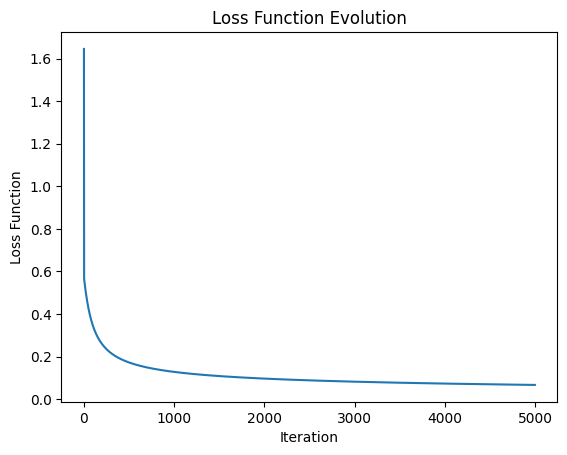

In [154]:
plt.plot(loss_in_time)
plt.title('Loss Function Evolution')
plt.xlabel('Iteration')
plt.ylabel('Loss Function')

Text(0, 0.5, 'dJ(w,b)/dw')

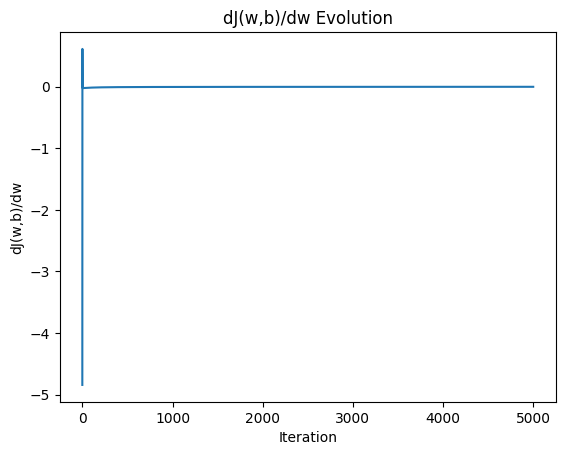

In [155]:
plt.plot(dw_in_time)
plt.title('dJ(w,b)/dw Evolution')
plt.xlabel('Iteration')
plt.ylabel('dJ(w,b)/dw')

Text(0, 0.5, 'dJ(w,b)/db')

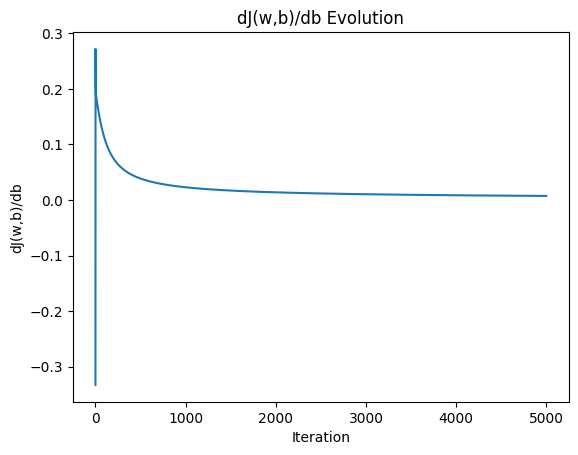

In [156]:
plt.plot(db_in_time)
plt.title('dJ(w,b)/db Evolution')
plt.xlabel('Iteration')
plt.ylabel('dJ(w,b)/db')

# 7. Visualize Trained model

Text(10, 0.5, 'decision \n border \n x* = 6.41')

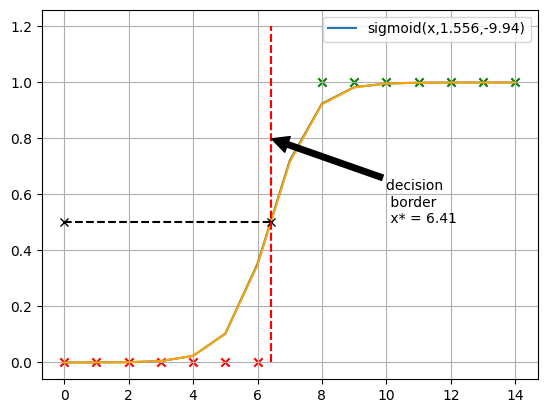

In [161]:
plt.plot(x,sigmoid(x,w_in_time[-1],b_in_time[-1]))
for x_i, y_i in zip(list(x),list(y)):
    if x_i < 7:
        plt.scatter(x_i,y_i,color='red',marker='x')
    if x_i > 7:
        plt.scatter(x_i,y_i,color='green',marker='x')
plt.grid('on')
plt.legend(['sigmoid(x,'+str(w_in_time[-1])[:5]+','+str(b_in_time[-1])[:5]+')'])

x_border_sig = (-np.log(1/0.5 - 1) - b1)/w1  

plt.plot(x,sigmoid(x,1.55,-9.93),color="orange")
plt.plot([x_border_sig,x_border_sig],[0,1.2],color='red',linestyle='dashed')

plt.plot([0,x_border_sig],[0.5,0.5],color='black',linestyle='dashed',marker='x')
plt.plot([x_border_sig,x_border_sig],[0,1.2],color='red',linestyle='dashed')

plt.annotate('decision \n border \n x* = {:.2f}'.format(x_border_sig), 
             xy=(x_border_sig, 0.8), 
             xytext=(10, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.01))